### Loading data


In [159]:
import numpy as np
import pandas as pd
data = pd.read_csv('Data.csv')
# Loaded the dataset into a pandas DataFrame

### Normalize the data


In [160]:
data = pd.read_csv('Data.csv')
X_mean , Y_mean = data.mean()
X_std , Y_std = data.std()
data['X']= (data['X'] - X_mean)/X_std
shuffled_data = data.sample(frac=1)
print(shuffled_data)


            X         Y
334 -1.549411 -2.387095
219  0.296033  0.549423
166 -0.621496  0.094766
63  -1.030055  1.254547
122 -1.307045 -0.428412
..        ...       ...
536 -0.084828  1.993922
260  1.539024  3.744162
61   0.496850  0.098631
949  0.483001  2.447080
394 -1.608271 -2.060352

[1000 rows x 2 columns]


### TEST TRAIN SPLIT

In [161]:
split_ratio = 0.8
row_no, col_no = shuffled_data.shape
train_length = int(row_no*split_ratio)

Train = shuffled_data[:train_length]
Test = shuffled_data[train_length:]

X_Train = Train['X'].values
X_Test = Test['X'].values
Y_Test = Test['Y'].values
Y_Train = Train['Y'].values

## Poly Reg

In [162]:
import matplotlib.pyplot as plt
def poly_transform(data: np.ndarray, degrees: int):
    transform_data = np.ones((data.shape[0], 1))
    for i in range(1, degrees + 1):
        transformed_feature = data ** i
        transform_data = np.insert(transform_data, i, transformed_feature, axis=1)
    return transform_data

[1.6868615096689166, 1.594019207667282, 0.9394001430514265, 0.9709292304720242, 1.020491227005324, 0.9903381480993214, 0.9705972493758557, 0.9818335628073168, 4.574547474265683e+160]


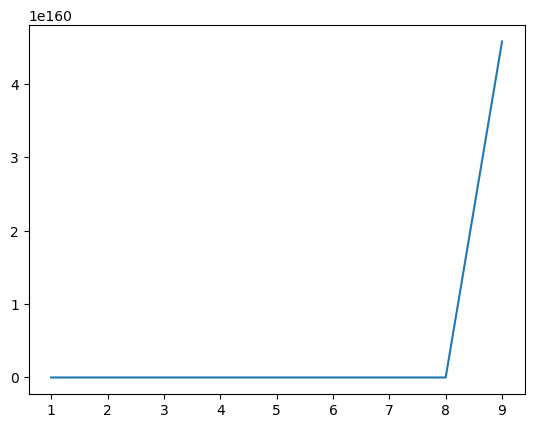

In [163]:
import numpy as np
import matplotlib.pyplot as plt
def bgd_regressor(train, test, learning_rate=0.0022, max_iters=500):
    X = train
    Y = test
    W = np.zeros(train.shape[1])
    n = len(train)
    for _ in range(max_iters):
        Y_pred = np.dot(X, W)
        gradient = np.dot(X.T, Y_pred - Y)
        change = (learning_rate / len(X)) * gradient
        W -= change
    return W

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

degrees = [1,2,3,4,5,6,7,8,9]
output = []
for i in degrees:
    X_Train_poly = poly_transform(X_Train, i)
    X_Test_poly = poly_transform(X_Test, i)
    W = bgd_regressor(X_Train_poly, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly, W)
    mse = mean_squared_error(Y_Test, Y_Test_pred)
    output.append(mse)

print(output)
plt.plot(degrees, output)
plt.show()

## Task 2
 

### Loading data


In [164]:
import numpy as np
import pandas as pd
data = pd.read_csv('data2.csv')

### Normalize the data

In [165]:
data = pd.read_csv('data2.csv')
Height_mean , Width_mean , Weight_mean = data.mean()
Height_std , Width_std , Weight_std = data.std()
data['Height'] = (data['Height'] - Height_mean)/ Height_std
data['Width'] = (data['Width'] - Width_mean)/ Width_std
data = np.array(data)
np.random.shuffle(data)
print(data)

[[-1.42274809e+00 -1.39416309e+00  1.97000000e+01]
 [-3.16222132e-01  2.10056740e-01  3.20000000e+02]
 [-6.54026580e-01 -6.06111750e-01  1.10000000e+02]
 [ 6.43694038e-01  1.66538618e+00  9.00000000e+02]
 [-1.57869014e+00 -1.93918497e+00  9.80000000e+00]
 [-4.69177858e-01  2.83849429e-01  5.00000000e+02]
 [-8.56863231e-01 -9.46602130e-01  6.90000000e+01]
 [ 2.25476858e+00  1.38201988e+00  9.75000000e+02]
 [ 1.39214122e+00  4.62695856e-01  7.00000000e+02]
 [ 1.28384035e+00  7.77145247e-01  6.50000000e+02]
 [-3.67269589e-01 -1.72194132e-01  2.00000000e+02]
 [-6.67488364e-01 -5.99112122e-01  1.20000000e+02]
 [-3.01197195e-01  5.68580060e-01  7.70000000e+02]
 [ 1.22616699e+00  3.21457600e-01  5.00000000e+02]
 [-7.78122295e-01 -8.11058486e-01  8.00000000e+01]
 [ 6.90028704e-01  1.59503399e+00  8.50000000e+02]
 [-1.57647373e+00 -1.92880417e+00  9.90000000e+00]
 [ 1.55428922e+00  4.24909729e-01  6.10000000e+02]
 [ 1.46751241e-01  1.02414907e+00  1.55000000e+03]
 [ 2.11513466e+00  1.12042361e+

## Split Data

In [166]:
n, m = data.shape
split_ratio = 0.8
Train_2 = data[:int(0.8*n),:]
Test_2 = data[int(0.8*n):,:]
X_Train = Train_2[:,:-1]
Y_Train = Train_2[:,-1]
X_Test = Test_2[:,:-1]
Y_Test = Test_2[:,-1]

In [167]:
import matplotlib.pyplot as plt
def poly_transform_2(data: np.ndarray, degrees: int):
    transform_data = np.ones((data.shape[0], 1))
    for i in range(1, degrees + 1):
        transformed_feature = data ** i
        transform_data = np.concatenate((transform_data,transformed_feature), axis=1)
    return transform_data

## Regression with 0.5

In [168]:
def half_reg(X:np.ndarray, Y:np.ndarray,max_iter = 500 ,penalty = 0.07, learning_rate = 0.00018):
    n, m = X.shape
    W = np.zeros(X.shape[1])
    for _ in range(max_iter):
        Y_pred = np.dot(X,W)
        flag = True
        for iW in W:
            if iW == 0.0:
                flag = False
        if flag == False:
            grad = 1/n*np.dot(X.T, Y_pred-Y)
        else:
            grad = 1/n*np.dot(X.T, Y_pred-Y) + penalty*0.5*W**-0.5
        W -= learning_rate*grad
        learning_rate /=1.000005
    return W

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X_trans_Train = poly_transform_2(X_Train,5)
X_trans_Test = poly_transform_2(X_Test,5)
W_half = half_reg(X_trans_Train,Y_Train)
y_pred = np.dot(X_trans_Test, W_half)
mse = mean_squared_error(Y_Test, y_pred)
print(mse)

149697.56724715856


In [169]:
def one_deg(X: np.ndarray,Y: np.ndarray, learning_rate = 0.003, l1_penalty = 0.9, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = (1/n)*np.dot(X.T, Y_pred-Y) + 0.5*l1_penalty*np.sign(W)
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_one_deg(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X_transformed_Train = poly_transform_2(X_Train,3)
X_Transformed_Test  = poly_transform_2(X_Test,3)
W_one = one_deg(X_transformed_Train, Y_Train)
W_one
print(W_one)
Y_pred_one_deg = np.dot(X_Transformed_Test, W_one)

mse_one = mean_squared_error_one_deg(Y_Test, Y_pred_one_deg)
print(mse_one)

[332.205306    56.06307283 303.62227527  -4.0417531   71.01044421
   3.65813258 -17.11823611]
8234.929070351402


In [170]:
def two_deg(X: np.ndarray,Y: np.ndarray, learning_rate = 0.002, l1_penalty = 0.9, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = (1/n)*np.dot(X.T, Y_pred-Y) + l1_penalty*(W)
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_two_deg(y_true, y_pred):
    return np.mean((y_true - y_pred) **2)

X_transformed_two = poly_transform_2(X_Train,3)
X_transformed_Test_two = poly_transform_2(X_Test,3)
W_two = two_deg(X_transformed_two, Y_Train)
print(W_two)
Y_pred_two_deg = np.dot(X_transformed_Test_two, W_two)
mse_one = mean_squared_error_two_deg(Y_Test, Y_pred_two_deg)
print(mse_one)

[127.35029324  31.44921375  62.77086407  62.06517485  90.54447536
  18.31980469  62.04189458]
37835.43018805751
